In [2]:
feature_names = list()
for index in range(1, 4):
    feature_names.extend(["Suit"+str(index), "Rank"+str(index)])

feature_names.append('class')


training_input_file = os.path.abspath('/Users/jimmynguyen/Desktop/csv/poker-hand-training-true.csv')
testing_input_file = os.path.abspath('/Users/jimmynguyen/Desktop/csv/poker-hand-testing.csv')

np.random.seed(350)    


class myConfigs:
    features = 0
    classes = 0


config = myConfigs()

In [3]:


train = pd.read_csv(training_input_file, names=feature_names)
test = pd.read_csv(testing_input_file, names=feature_names)


config.features = len(train.columns) - 1
config.classes = len(set(train['class']))


train = train.sample(frac=1).reset_index(drop=True)


trainy = np.array(train['class'])
trainx = np.array(train.drop('class', 1))

testy = np.array(test['class'])
testx = np.array(test.drop('class', 1))


scaler = StandardScaler()

trainset = np.empty(trainx.shape, dtype = float)
testset = np.empty(testx.shape, dtype = float)


for i in range(len(trainx)):
    trainset[i] = trainx[i].astype(float)


for i in range(len(testx)):
    testset[i] = testx[i].astype(float)

scaler.fit(trainset)  


datatrain = scaler.transform(trainset)
datatest = scaler.transform(testset)


In [4]:
model = lm.LinearRegression()
trainModel = model.fit(trainx, trainy)

preds = model.predict(testx)


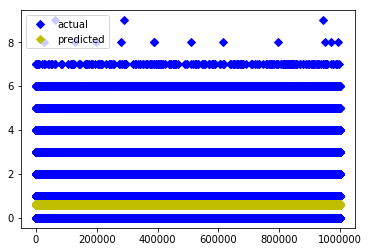

Average error : 0.6183909504554245
RMSE : 0.7734471024389038


In [5]:
plt.plot(testy, 'bD', label='actual')
plt.plot(preds, 'yD', label='predicted')
plt.legend()
plt.show()

avg = sum([math.fabs(x-y) for x, y in zip(preds, testy)]) / len(preds)
print("Average error :", avg)

rms = sum([(x-y)**2 for x, y in zip(preds, testy)]) / len(preds)
rms = math.sqrt(rms)
print("RMSE :", rms)


In [6]:
pred1 = preds
conf = [[0] * config.classes for x in range(config.classes)]
acc = 0

for i in range(len(pred1)):
    pred2 = int(round(pred1[i]))
    act = int(round(testy[i]))
    conf[act][pred2] += 1
    if pred2 == act:
        acc += 1

header = [""]
for l in range(config.classes):
    header.append("Pred " + str(l))
    
title = PrettyTable(header)
l = 0
for c in conf:
    title.add_row(["Real " + str(l)] + c)
    l += 1

print(title)
print("Accuracy :", acc * 100 / len(pred1))

+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|        | Pred 0 | Pred 1 | Pred 2 | Pred 3 | Pred 4 | Pred 5 | Pred 6 | Pred 7 | Pred 8 | Pred 9 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| Real 0 |   0    | 501209 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 1 |   0    | 422498 |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 2 |   0    | 47622  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 3 |   0    | 21121  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 4 |   0    |  3885  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 5 |   0    |  1996  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |   0    |
| Real 6 |   0    |  1424  |   0    |   0    |   0    |   0    |   0    |   0    |   0    |